# CT Plot Visualization Notebook

This notebook demonstrates how to process and visualize CT (Computed Tomography) scan data using techniques like wavelet decomposition and Besov priors. The visualizations aim to provide insights into the data structures and modeling techniques.

The key objectives are:
- Load and preprocess CT image data.
- Generate visualizations for projection angles and positions.
- Apply wavelet-based Besov priors for advanced image modeling.

## Importing Required Libraries

The following libraries are used:
- `numpy`: For numerical computations and array manipulation.
- `matplotlib`: For creating plots and visualizations.
- `seaborn`: For aesthetic enhancements to plots.
- `pywt`: For wavelet decomposition.
- `arviz`: For Bayesian analysis and diagnostics.

Additionally, custom modules like `besov_prior2D` are utilized for generating Besov priors.


In [1]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import sys 
sys.path.append("..")
from besov_prior2D import besov_prior2D
import pywt
import seaborn as sns
sns.set_palette("Paired_r")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25

cm_to_in = 1/2.54

## Loading CT Data

Here we load the necessary datasets:
- `CT_IM.npy`: Contains the CT image data.
- `CT_data.npy`: Contains projection data (angles and positions).

These datasets are used for visualizing CT scans and their projections.

## Visualizing CT Images

The CT image data is visualized using `imshow`. The following figures are generated:
- **Figure 9a**: Displays the CT image (`Im`) with appropriate color scaling.
- **Figure 9b**: Shows the projection data (`Data`) with labels for projection angle and position.

The plots are saved as `Figure9a.pdf` and `Figure9b.pdf`.

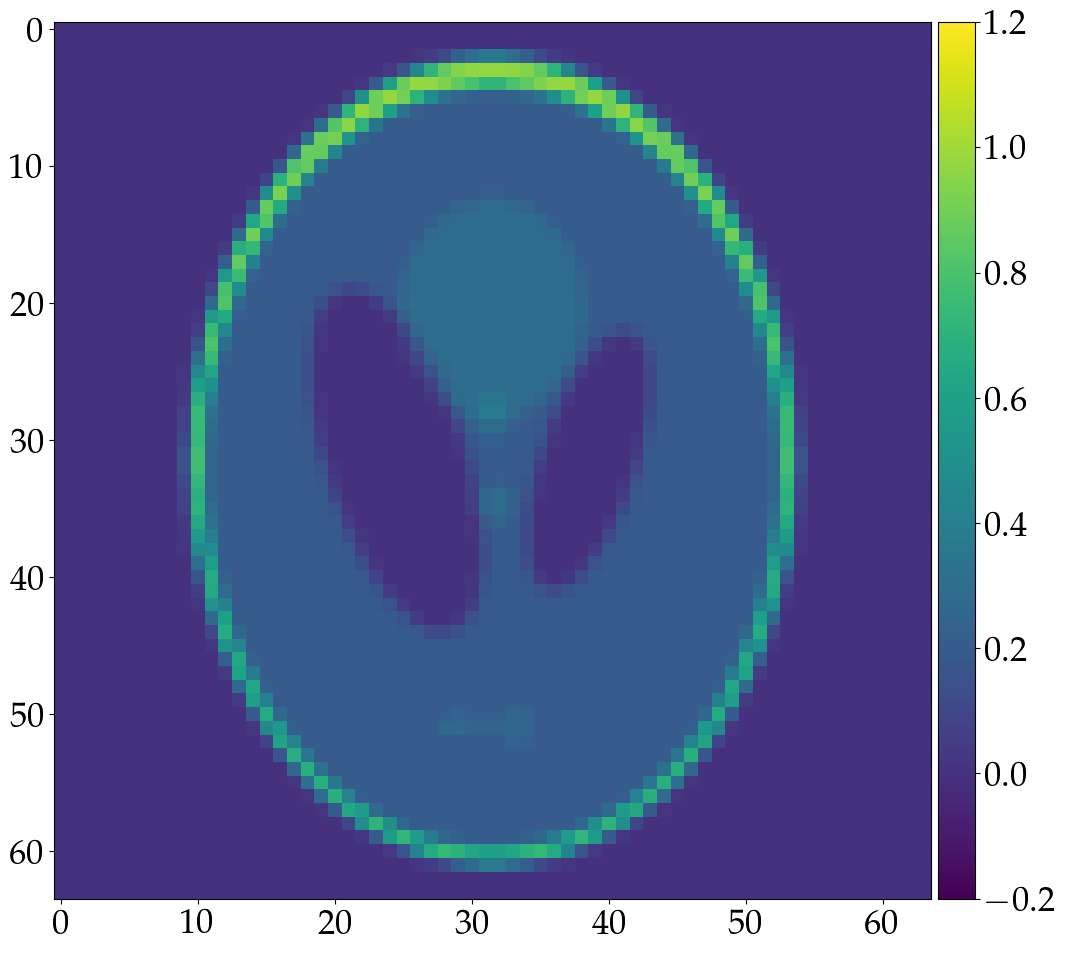

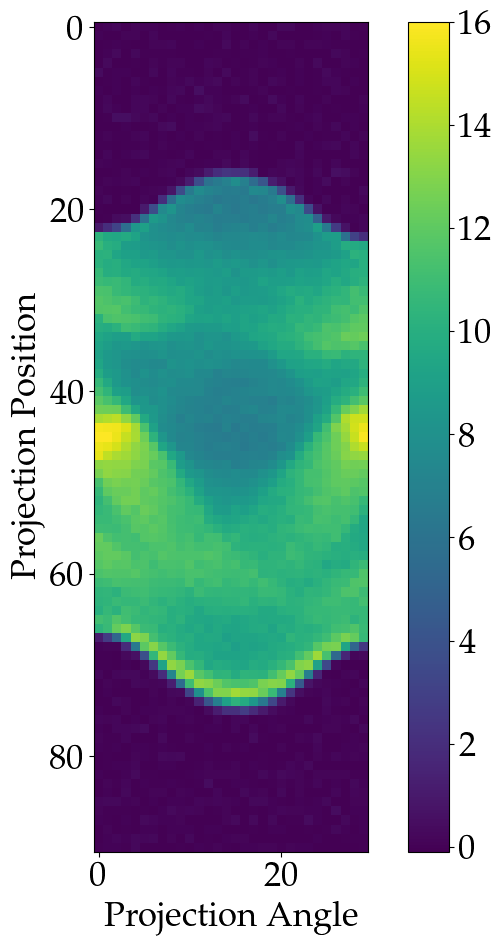

In [ ]:
Im = np.load("CT_Plot_Data/CT_IM.npy")
Data = np.load("CT_Plot_Data/CT_data.npy")
fig = plt.figure( figsize=(71.2/3*cm_to_in,71.2/3*cm_to_in), layout="constrained")
ax = plt.axes()
im = plt.imshow(Im,vmin=-0.2,vmax=1.2)
cax = fig.add_axes([ax.get_position().x1+0.1,ax.get_position().y0-0.058,0.04,ax.get_position().height+0.168])
plt.colorbar(im, cax=cax)
plt.savefig('Figure9a.pdf',dpi = 300,bbox_inches='tight')
plt.figure( figsize=(71.2/3*cm_to_in,71.2/3*cm_to_in), layout="constrained")
plt.axes()
plt.imshow(Data, vmin=-0.1,vmax=16.0)
plt.colorbar()
plt.xlabel(r'Projection Angle',fontsize=25)
plt.ylabel(r'Projection Position',fontsize=25)
plt.savefig('Figure9b.pdf',dpi = 300,bbox_inches='tight')

## Applying Besov Priors for Advanced Modeling

Besov priors are applied to the CT data for wavelet-based image modeling. This involves:
1. Generating prior samples using `besov_prior2D`.
2. Visualizing the prior samples and posterior samples.

Each visualization is labeled for clarity:
- **(a)** to **(f)**: Represent different Besov prior configurations and their results.

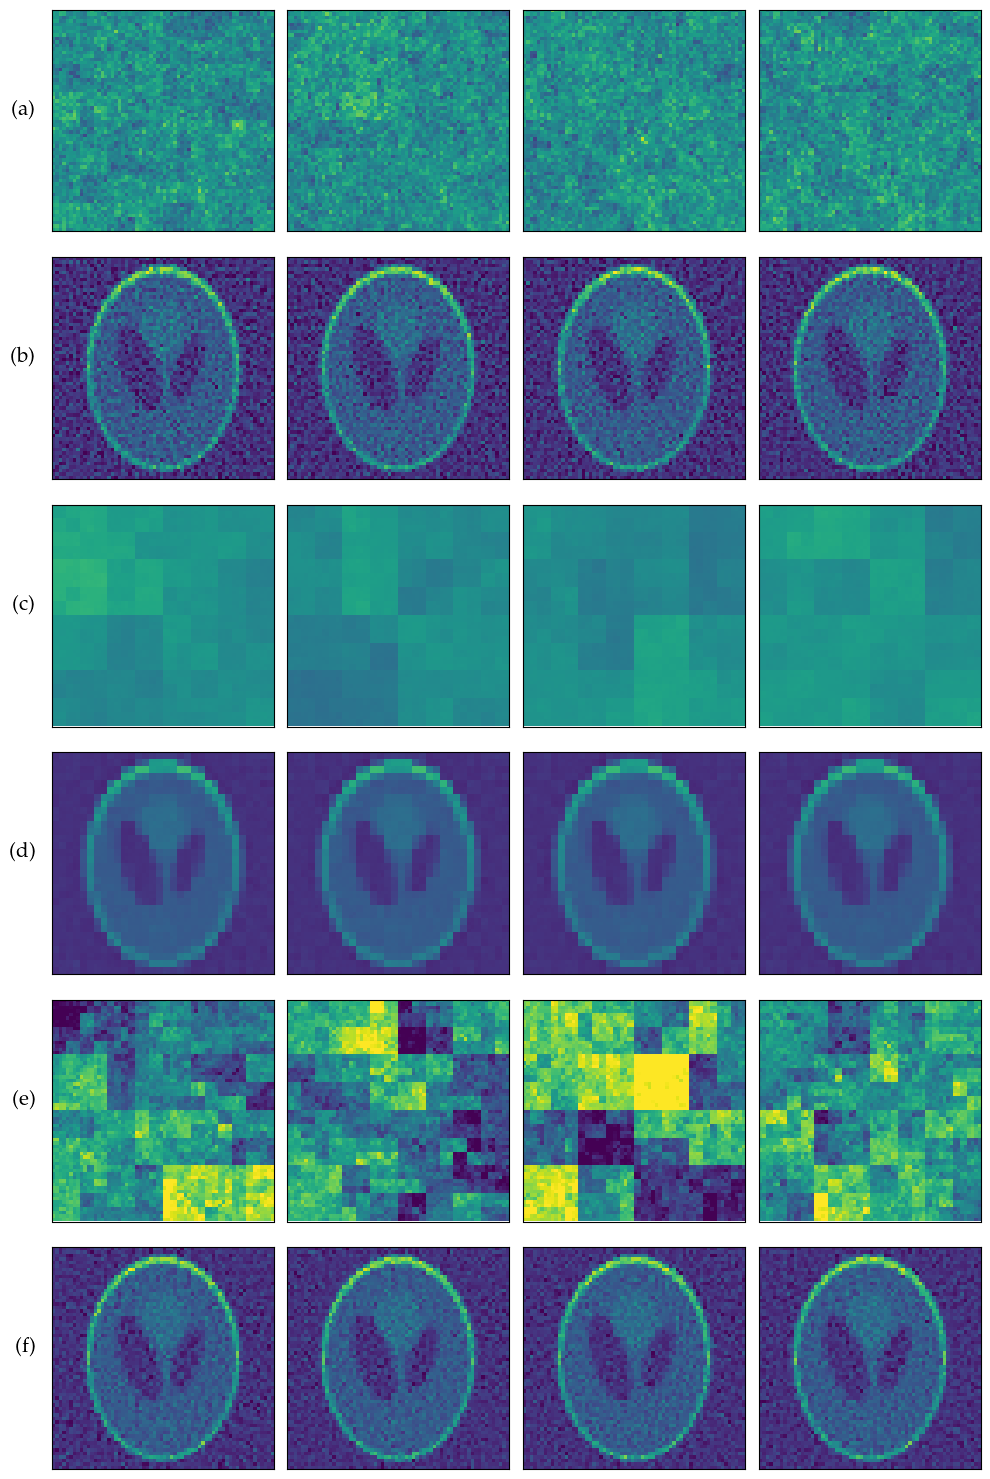

In [ ]:
np.random.seed(5)
wavelet='db1'
level = 0
J = 6
n = 2**J
a, slices, shape = pywt.ravel_coeffs(pywt.wavedec2(np.ones((n,n)),wavelet,mode='periodization',level=J-level))
s= [2.5]
p = [1.0]
prior_1 = besov_prior2D(J,0.025,level, slices, shape,s=s[0],p=p[0], wavelet=wavelet)
index_accept_1 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(s[0]) + str(p[0])+ '.npy')
chain_1 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(s[0]) + str(p[0])+ '.npy')
chain_accept_1 = chain_1[:,index_accept_1]
s= [1.0]
p = [1.5]
wavelet='db1'
prior_2 = besov_prior2D(J,0.025,level, slices, shape,s=s[0],p=p[0], wavelet=wavelet)
index_accept_2 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(s[0]) + str(p[0])+ '.npy')
chain_2 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(s[0]) + str(p[0])+ '.npy')
chain_accept_2 = chain_2[:,index_accept_2]
s= [2.5]
p = [1.5]
wavelet='db1'
prior_3 = besov_prior2D(J,0.025,level, slices, shape,s=s[0],p=p[0], wavelet=wavelet)
index_accept_3 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(s[0]) + str(p[0])+ '.npy')
chain_3 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(s[0]) + str(p[0])+ '.npy')
chain_accept_3 = chain_3[:,index_accept_3]
fig, ax = plt.subplots(6,4, figsize=(10,15))
for i in range(ax.shape[1]):
    ax[0,i].imshow(prior_2.sample(),vmin=-1.0,vmax=1.0)
    ax[1,i].imshow(chain_accept_2[:,i].reshape((2**J,2**J)),vmin=-0.2,vmax=1.2)
    ax[2,i].imshow(prior_3.sample(),vmin=-1.0,vmax=1.0)
    ax[3,i].imshow(chain_accept_3[:,i].reshape((2**J,2**J)),vmin=-0.2,vmax=1.2)
    ax[4,i].imshow(prior_1.sample(),vmin=-1.0,vmax=1.0)
    ax[5,i].imshow(chain_accept_1[:,i].reshape((2**J,2**J)),vmin=-0.2,vmax=1.2)
    
    ax[0,0].set_ylabel(r'(a)',fontsize=15.0)
    ax[0,0].yaxis.label.set(rotation='horizontal', ha='right')
    ax[1,0].set_ylabel(r'(b)', fontsize=15.0)
    ax[1,0].yaxis.label.set(rotation='horizontal', ha='right')
    ax[2,0].set_ylabel(r'(c)',fontsize=15.0)
    ax[2,0].yaxis.label.set(rotation='horizontal', ha='right')
    ax[3,0].set_ylabel(r'(d)',fontsize=15.0)
    ax[3,0].yaxis.label.set(rotation='horizontal', ha='right')
    ax[4,0].set_ylabel(r'(e)',fontsize=15.0)
    ax[4,0].yaxis.label.set(rotation='horizontal', ha='right')
    ax[5,0].set_ylabel(r'(f)',fontsize=15.0)
    ax[5,0].yaxis.label.set(rotation='horizontal', ha='right')
        #plt.colorbar(im1, ax=ax[0,i])
        #plt.colorbar(im2, ax=ax[1,i])
        #plt.colorbar(im3, ax=ax[2,i])
        #plt.colorbar(im4, ax=ax[3,i])

    #Im1=ax[i,0].imshow(coeff[J-i][0], vmin=-0.5,vmax=0.5)
    for j in range(ax.shape[0]):
        ax[j,i].set_xticklabels([])
        ax[j,i].set_yticklabels([])
        ax[j,i].xaxis.set_ticks_position('none')
        ax[j,i].yaxis.set_ticks_position('none')
plt.subplots_adjust(hspace=0,wspace=0)
plt.tight_layout()
plt.savefig('Figure11.pdf',dpi=300)

## High-Density Interval (HDI) Analysis

The high-density interval (HDI) is computed using `arviz.hdi`. This helps in:
- Calculating the mean of posterior samples.
- Determining the width of the HDI for uncertainty quantification.

Visualizations:
- **Figure 10a**: Displays the posterior mean.
- **Figure 10b**: Shows the HDI width for each pixel.

C:\Users\ahor\AppData\Local\Temp\ipykernel_18648\3888661936.py:6: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  cred=az.hdi(chain_accept.T,hdi_prob=0.95)


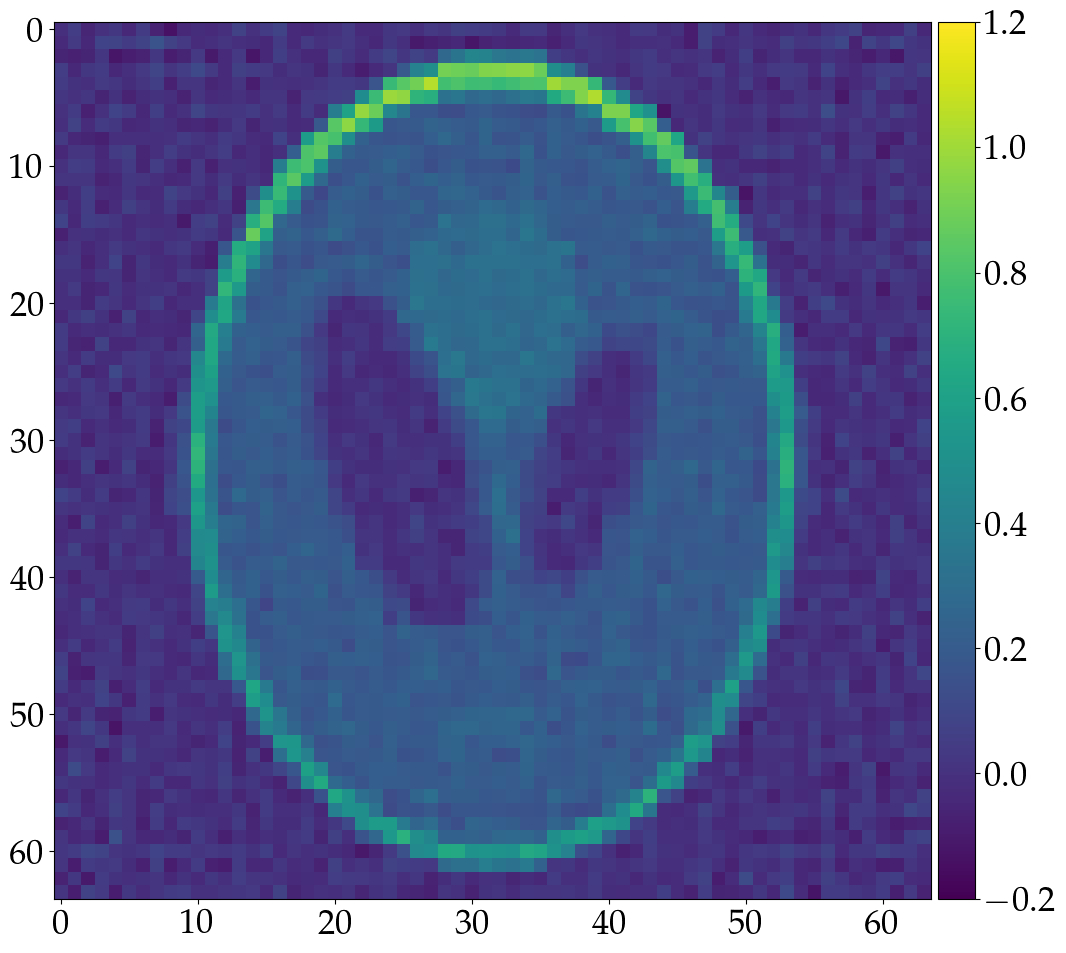

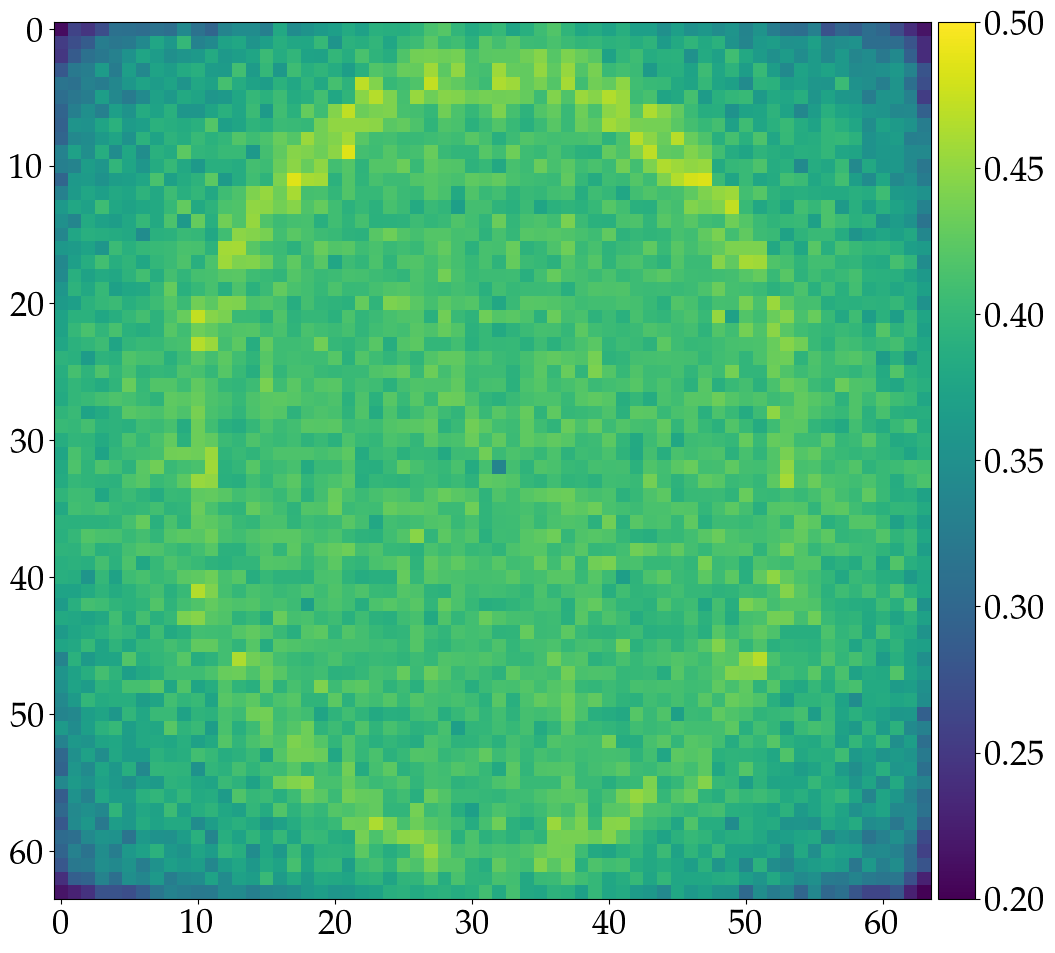

In [ ]:

chain = np.load('CT_Plot_Data/CTSamples'+ 'db1' + str(1.0) + str(1.5)+ '.npy')
index_accept = np.load("CT_Plot_Data/CTindex_accept" + 'db1' + str(1.0) + str(1.5)+ '.npy')
chain_accept = chain[:,index_accept]
Mean = np.mean(chain_accept,axis=1)
cred=az.hdi(chain_accept.T,hdi_prob=0.95)
width = cred[:,1]-cred[:,0]
n = 64
fig =plt.figure(figsize=(71.2/3*cm_to_in,71.2/3*cm_to_in), layout="constrained")
ax = plt.axes()
im =plt.imshow(Mean.reshape((n,n)), vmin=-0.2,vmax=1.2)
cax = fig.add_axes([ax.get_position().x1+0.1,ax.get_position().y0-0.058,0.04,ax.get_position().height+0.168])
plt.colorbar(im, cax=cax)
fig.savefig('Figure10a.pdf',dpi = 300,bbox_inches='tight')
fig=plt.figure(figsize=(71.2/3*cm_to_in,71.2/3*cm_to_in), layout="constrained")
ax = plt.axes()
im=plt.imshow(width.reshape((n,n)),vmin=0.2, vmax=0.5)
cax = fig.add_axes([ax.get_position().x1+0.1,ax.get_position().y0-0.058,0.04,ax.get_position().height+0.168])
plt.colorbar(im, cax=cax)
fig.savefig('Figure10b.pdf',dpi = 300,bbox_inches='tight')

    


## Wavelet Decomposition of CT Data

Wavelet decomposition is performed to analyze the CT data at multiple levels. The following figures are generated:
- **Figure 12**: Horizontal wavelet coefficients.
- **Figure 13**: Vertical wavelet coefficients.

Each subplot represents a different configuration of `s` and `p` parameters for Besov priors.

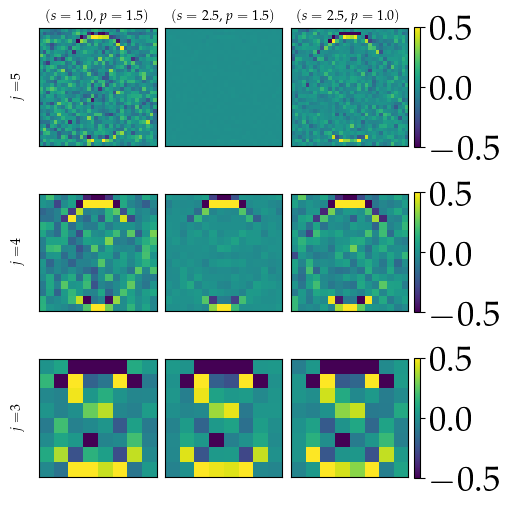

In [ ]:
l = 1
index = 4
index_accept_1 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(1.0) + str(1.5)+ '.npy')
chain_1 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(1.0) + str(1.5)+ '.npy')
chain_accept_1 = chain_1[:,index_accept_1]
coeff_1 = pywt.wavedec2(chain_accept_1[:,index].reshape((2**J,2**J)), wavelet, mode='periodization', level=J)
index_accept_2 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(2.5) + str(1.5)+ '.npy')
chain_2 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(2.5) + str(1.5)+ '.npy')
chain_accept_2 = chain_2[:,index_accept_2]
coeff_2 = pywt.wavedec2(chain_accept_2[:,index].reshape((2**J,2**J)), wavelet, mode='periodization', level=J)
index_accept_3 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(2.5) + str(1.0)+ '.npy')
chain_3 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(2.5) + str(1.0)+ '.npy')
chain_accept_3 = chain_3[:,index_accept_3]
coeff_3 = pywt.wavedec2(chain_accept_3[:,index].reshape((2**J,2**J)), wavelet, mode='periodization', level=J)
fig, ax = plt.subplots(3,3, figsize=(5,5), constrained_layout=True)
for i in range(ax.shape[0]):
    Im1=ax[i,0].imshow(coeff_1[J-i][l-1], vmin=-0.5,vmax=0.5)
    ax[i,0].set_xticklabels([])
    ax[i,0].set_yticklabels([])
    ax[i,0].xaxis.set_ticks_position('none')
    ax[i,0].yaxis.set_ticks_position('none')
    ax[i,0].set_yticklabels([])
    ax[i,0].set_ylabel(r'$j=$' + str(J-i-1), fontsize=10)
    Im2=ax[i,1].imshow(coeff_2[J-i][l-1],vmin=-0.5,vmax=0.5)
    ax[i,1].set_xticklabels([])
    ax[i,1].set_yticklabels([])
    ax[i,1].xaxis.set_ticks_position('none')
    ax[i,1].yaxis.set_ticks_position('none')
    Im3=ax[i,2].imshow(coeff_3[J-i][l-1], vmin=-0.5,vmax=0.5)
    ax[i,2].set_xticklabels([])
    ax[i,2].set_yticklabels([])
    ax[i,2].xaxis.set_ticks_position('none')
    ax[i,2].yaxis.set_ticks_position('none')
    if i==0:
        ax[i,0].set_title(r'$(s=1.0,p=1.5)$', fontsize=10)
        ax[i,1].set_title(r'$(s=2.5,p=1.5)$', fontsize=10)
        ax[i,2].set_title(r'$(s=2.5,p=1.0)$', fontsize=10)
    #plt.colorbar(Im3, ax=ax[i,2])
    fig.colorbar(Im3, ax=ax[i,2],shrink=0.80)
#plt.tight_layout()
plt.savefig('Figure12.pdf',dpi=300)

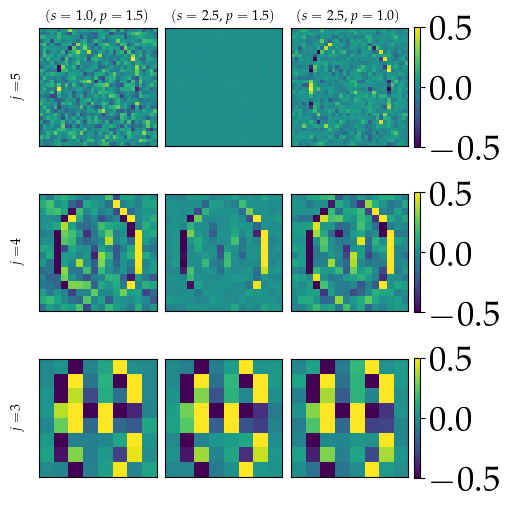

In [ ]:
l = 2
index = 4
index_accept_1 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(1.0) + str(1.5)+ '.npy')
chain_1 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(1.0) + str(1.5)+ '.npy')
chain_accept_1 = chain_1[:,index_accept_1]
coeff_1 = pywt.wavedec2(chain_accept_1[:,index].reshape((2**J,2**J)), wavelet, mode='periodization', level=J)
index_accept_2 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(2.5) + str(1.5)+ '.npy')
chain_2 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(2.5) + str(1.5)+ '.npy')
chain_accept_2 = chain_2[:,index_accept_2]
coeff_2 = pywt.wavedec2(chain_accept_2[:,index].reshape((2**J,2**J)), wavelet, mode='periodization', level=J)
index_accept_3 = np.load("CT_Plot_Data/CTindex_accept" + wavelet + str(2.5) + str(1.0)+ '.npy')
chain_3 =  np.load('CT_Plot_Data/CTSamples'+ wavelet + str(2.5) + str(1.0)+ '.npy')
chain_accept_3 = chain_3[:,index_accept_3]
coeff_3 = pywt.wavedec2(chain_accept_3[:,index].reshape((2**J,2**J)), wavelet, mode='periodization', level=J)
fig, ax = plt.subplots(3,3, figsize=(5,5), constrained_layout=True)
for i in range(ax.shape[0]):
    Im1=ax[i,0].imshow(coeff_1[J-i][l-1], vmin=-0.5,vmax=0.5)
    ax[i,0].set_xticklabels([])
    ax[i,0].set_yticklabels([])
    ax[i,0].xaxis.set_ticks_position('none')
    ax[i,0].yaxis.set_ticks_position('none')
    ax[i,0].set_yticklabels([])
    ax[i,0].set_ylabel(r'$j=$' + str(J-i-1), fontsize=10)
    Im2=ax[i,1].imshow(coeff_2[J-i][l-1],vmin=-0.5,vmax=0.5)
    ax[i,1].set_xticklabels([])
    ax[i,1].set_yticklabels([])
    ax[i,1].xaxis.set_ticks_position('none')
    ax[i,1].yaxis.set_ticks_position('none')
    Im3=ax[i,2].imshow(coeff_3[J-i][l-1], vmin=-0.5,vmax=0.5)
    ax[i,2].set_xticklabels([])
    ax[i,2].set_yticklabels([])
    ax[i,2].xaxis.set_ticks_position('none')
    ax[i,2].yaxis.set_ticks_position('none')
    if i==0:
        ax[i,0].set_title(r'$(s=1.0,p=1.5)$', fontsize=10)
        ax[i,1].set_title(r'$(s=2.5,p=1.5)$', fontsize=10)
        ax[i,2].set_title(r'$(s=2.5,p=1.0)$', fontsize=10)
    #plt.colorbar(Im3, ax=ax[i,2])
    fig.colorbar(Im3, ax=ax[i,2],shrink=0.80)
#plt.tight_layout()
plt.savefig('Figure13.pdf',dpi=300)